In [2]:
import spotipy 
import numpy as np
import json
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

In [3]:
#------------------------spotify_details----------------------------
#Please go to developer.spotify.com and go to dashboard to register your app. Then return with your credentials
# this part is for you to fill in with your information
username='aryaj-3'
client_id = '357b3092e5204e0fb349b1f7d7f64acf'
client_secret = '89a7e56dd54e413c81d8531742b60d6b'

In [4]:
#spotify_credentials
#this part is essential for syncing spotify albums

redirecturi='http://localhost:5000'
thescope='playlist-read-private'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
plists = {}

In [13]:
def get_features_for_playlist(uri):
    playlist_id = uri.split(':')[2]
    results = sp.user_playlist(username, playlist_id)
        # initialize the dictionary
    playlist_name = results['name']
    plists[playlist_name] = {}
    plists[playlist_name]['name'] = []
    plists[playlist_name]['track uri'] = []
    plists[playlist_name]['acousticness'] = []
    plists[playlist_name]['danceability'] = []
    plists[playlist_name]['energy'] = []
    plists[playlist_name]['instrumentalness'] = []
    plists[playlist_name]['liveness'] = []
    plists[playlist_name]['loudness'] = []
    plists[playlist_name]['speechiness'] = []
    plists[playlist_name]['tempo'] = []
    plists[playlist_name]['valence'] = []
    plists[playlist_name]['popularity'] = []
    
    for track in results['tracks']['items']:
        # print(json.dumps(track, indent=4))              # DEBUG STATEMENT
        
        # save metadata stuff
        name = track['track']['name']
        print(name)
        track_uri = track['track']['uri']
        plists[playlist_name]['name'].append(name)
        plists[playlist_name]['track uri'].append(track_uri)

        # extract features
        features = sp.audio_features(track_uri)
        plists[playlist_name]['acousticness'].append(features[0]['acousticness'])
        plists[playlist_name]['danceability'].append(features[0]['danceability'])
        plists[playlist_name]['energy'].append(features[0]['energy'])
        plists[playlist_name]['instrumentalness'].append(features[0]['instrumentalness'])
        plists[playlist_name]['liveness'].append(features[0]['liveness'])
        plists[playlist_name]['loudness'].append(features[0]['loudness'])
        plists[playlist_name]['speechiness'].append(features[0]['speechiness'])
        plists[playlist_name]['tempo'].append(features[0]['tempo'])
        plists[playlist_name]['valence'].append(features[0]['valence'])

In [14]:
uris = ['spotify:playlist:37i9dQZF1DWTyiBJ6yEqeu','spotify:playlist:37i9dQZF1DX70RN3TfWWJh']
for uri in uris:
        get_features_for_playlist(uri)

print(plists)

rockstar
All Time Low
iSpy (feat. Lil Yachty)
Believer
Rap God
Let You Down
Chill Bill (feat. J. Davi$ & Spooks)
HUMBLE.
Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)
'Till I Collapse
In the Name of Love
Mask Off
Flight
Centuries
Gucci Gang
Thunder
Purple Lamborghini (with Rick Ross)
River (feat. Ed Sheeran)
Remember the Name (feat. Styles of Beyond)
Heathens
Stronger
Broccoli
Bounce Back
Closer
Outlet
POWER
Portland
Starboy
Paris
Black Beatles
Numb
Call on Me - Ryan Riback Remix
One Night
$ave Dat Money (feat. Fetty Wap & Rich Homie Quan)
That's What I Like
Radioactive
Cold
It Ain't Me (with Selena Gomez)
No Problem (feat. Lil Wayne & 2 Chainz)
First of the Year (Equinox)
Shape of You
Passionfruit
I Don’t Wanna Live Forever (Fifty Shades Darker)
Human
Seven Nation Army
F*ck Up Some Commas
Redbone
Feel Good Inc.
Sail
Selfish (feat. Rihanna)
Beautiful People (feat. Khalid)
i'm so tired...
If I Can't Have You
Who Do You Love
Never Really O

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Top Gaming Tracks
ACOUSTICNESS | median: 0.09455 | mean: 0.13597424
DANCEABILITY | median: 0.704 | mean: 0.68892
ENERGY | median: 0.648 | mean: 0.6463599999999999
INSTRUMENTALNESS | median: 0.0 | mean: 0.028819346000000003
LIVENESS | median: 0.132 | mean: 0.23198
LOUDNESS | median: -5.837 | mean: -6.136239999999999
SPEECHINESS | median: 0.1075 | mean: 0.14942
TEMPO | median: 124.0215 | mean: 124.12947999999999
VALENCE | median: 0.459 | mean: 0.464126
POPULARITY | median: nan | mean: nan
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
Workout
ACOUSTICNESS | median: 0.1545 | mean: 0.20353516666666668
DANCEABILITY | median: 0.6735 | mean: 0.66215
ENERGY | median: 0.693 | mean: 0.7018333333333332
INSTRUMENTALNESS | median: 0.0 | mean: 5.1224666666666664e-05
LIVENESS | median: 0.12 | mean: 0.17351666666666665
LOUDNESS | median: -5.272 | mean: -5.3201
SPEECHINESS | median: 0.061149999999999996 | mean: 0.106108333333333

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


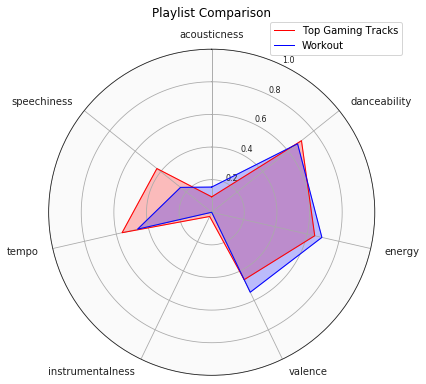

In [16]:
#radar_graph
# manually inspect all of the values to determine whether the median or mean is a better metric to plot
for playlist in plists:
    print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––")
    print(playlist)
    for feature in plists[playlist]:
        if feature != 'name' and feature != 'track uri':
            print(feature.upper(), "| median:", np.median(plists[playlist][feature]), "| mean:", np.mean(plists[playlist][feature]))
    

labels = ['acousticness', 'danceability', 'energy', 'valence', 'instrumentalness', 'tempo', 'speechiness']
num_vars = len(labels)

# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each playlist on the radar chart.
def add_to_radar(playlist, color):
    values = [np.median(plists[playlist]['acousticness']), np.median(plists[playlist]['danceability']), np.median(plists[playlist]['energy']), 
              np.median(plists[playlist]['valence']), np.mean(plists[playlist]['instrumentalness']), np.median(plists[playlist]['tempo']), 
              np.median(plists[playlist]['speechiness'])]
    # tempo values typically range from 50-220, so I divided by 220 to get a number between 0 and 1
    values[-2] = values[-2]/220
    # speechiness values values are highly concentrated between 0 and 0.25-ish, so I multiplied by 4. Adjust this if needed
    values[-1] = values[-1]*4
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=playlist)
    ax.fill(angles, values, color=color, alpha=0.25)

# # Add each additional playlist to the chart.
add_to_radar('Top Gaming Tracks', 'red')
add_to_radar('Workout','blue')

# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
    
# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
ax.tick_params(colors='#222222')         # color of tick labels
ax.tick_params(axis='y', labelsize=8)    # y-axis labels
ax.grid(color='#AAAAAA')                 # color of circular gridlines
ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
ax.set_facecolor('#FAFAFA')              # background color inside the circle itself

#Lastly, give the chart a title and a legend
ax.set_title('Playlist Comparison', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.savefig('Graph.png')
